In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Project Goal:** The goal of this project is to study if we can predict median household income of a county from the data on fresh markets in the county.

Let's create separate dataframes for data from the two csv file.

In [2]:
df_FM1=pd.read_csv('farmers_markets_from_usda.csv')   #initial dataframe with data on farmer's market.

In [3]:
df_FM1.head(2)

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 17:15


In [4]:
df_county=pd.read_csv('datasets_706231_1233065_wiki_county_info.csv')      #initial dataframe with county information.

In [5]:
df_county.head(2)

,number,county,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"


Since the deemographic data is given by county, let's sort and group data by county and merge the two dataframes. This will make data analysis and machine learning easier.

In [6]:
df_county_count=pd.DataFrame(df_FM1['County'].value_counts())

In [7]:
df_county_count.rename(columns={'County':'County_Count'},inplace=True)

In [8]:
df_county_count.head()

,County_Count
Los Angeles,128
Cook,111
Jefferson,100
Washington,93
Franklin,87


In [9]:
df_FM1.columns.values

array(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x',
       'y', 'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP',
       'Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs',
       'Seafood', 'Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat',
       'Nursery', 'Nuts', 'Plants', 'Poultry', 'Prepared', 'Soap',
       'Trees', 'Wine', 'Coffee', 'Beans', 'Fruits', 'Grains', 'Juices',
       'Mushrooms', 'PetFood', 'Tofu', 'WildHarvested', 'updateTime'],
      dtype=object)

In [10]:
df_FM1=df_FM1[['FMID', 'Website', 'city', 'County', 'State', 'zip', 'x', 'y', 'Location','Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood','Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery','Nuts', 'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine','Coffee', 'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms','PetFood', 'Tofu', 'WildHarvested']].copy(deep=True)

In [11]:
df_FM1.head(20)

,FMID,Website,city,County,State,zip,x,y,Location,Credit,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,1018261,https://sites.google.com/site/caledoniafarmers...,Danville,Caledonia,Vermont,5828,-72.140335,44.411037,NaN,Y,...,N,Y,Y,Y,N,N,Y,Y,N,N
1,1018318,http://www.StearnsHomestead.com,Parma,Cuyahoga,Ohio,NaN,-81.733940,41.374802,NaN,Y,...,N,N,N,Y,N,N,N,N,N,N
2,1009364,http://thetownofsixmile.wordpress.com/,Six Mile,Pickens,South Carolina,29682,-82.818703,34.804199,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1010691,NaN,Lamar,Barton,Missouri,64759,-94.274620,37.495628,NaN,Y,...,N,N,N,Y,N,N,N,N,N,N
4,1002454,NaN,New York,New York,New York,10029,-73.949303,40.793900,Private business parking lot,N,...,N,N,N,N,N,N,N,N,N,N
5,1011100,http://www.12southfarmersmarket.com,Nashville,Davidson,Tennessee,37204,-86.790710,36.118370,NaN,Y,...,N,Y,N,Y,N,Y,Y,Y,N,N
6,1009845,http://www.125thStreetFarmersMarket.com,New York,New York,New York,10027,-73.948250,40.808952,Federal/State government building grounds,Y,...,Y,Y,N,Y,N,Y,N,N,N,N
7,1005586,NaN,Wilmington,New Castle,Delaware,19801,-75.534462,39.742119,"On a farm from: a barn, a greenhouse, a tent, ...",N,...,N,N,N,Y,N,N,N,N,N,N
8,1008071,NaN,Washington,District of Columbia,District of Columbia,20009,-77.032051,38.917000,Other,Y,...,N,N,Y,Y,Y,Y,N,N,N,N
9,1012710,NaN,Washington,District of Columbia,District of Columbia,20011,-77.033447,38.955978,NaN,Y,...,N,Y,N,Y,N,N,N,Y,N,N


In [12]:
df_FM1['website_count']=df_FM1['Website'].notnull().astype(int)
df_FM1['OrganicYN']=df_FM1['Organic'].str.contains('Y').astype(float)
df_FM1['BakedgoodsYN']=df_FM1['Bakedgoods'].str.contains('Y').astype(float)
df_FM1['CheeseYN']=df_FM1['Cheese'].str.contains('Y').astype(float)
df_FM1['CraftsYN']=df_FM1['Crafts'].str.contains('Y').astype(float)
df_FM1['FlowersYN']=df_FM1['Flowers'].str.contains('Y').astype(float)
df_FM1['EggsYN']=df_FM1['Eggs'].str.contains('Y').astype(float)
df_FM1['SeafoodYN']=df_FM1['Seafood'].str.contains('Y').astype(float)
df_FM1['HerbsYN']=df_FM1['Herbs'].str.contains('Y').astype(float)
df_FM1['VegetablesYN']=df_FM1['Vegetables'].str.contains('Y').astype(float)
df_FM1['HoneyYN']=df_FM1['Honey'].str.contains('Y').astype(float)
df_FM1['JamsYN']=df_FM1['Jams'].str.contains('Y').astype(float)
df_FM1['MapleYN']=df_FM1['Maple'].str.contains('Y').astype(float)
df_FM1['MeatYN']=df_FM1['Meat'].str.contains('Y').astype(float)
df_FM1['NurseryYN']=df_FM1['Nursery'].str.contains('Y').astype(float)
df_FM1['NutsYN']=df_FM1['Nuts'].str.contains('Y').astype(float)
df_FM1['PlantsYN']=df_FM1['Plants'].str.contains('Y').astype(float)
df_FM1['PoultryYN']=df_FM1['Poultry'].str.contains('Y').astype(float)
df_FM1['PreparedYN']=df_FM1['Prepared'].str.contains('Y').astype(float)
df_FM1['SoapYN']=df_FM1['Soap'].str.contains('Y').astype(float)
df_FM1['TreesYN']=df_FM1['Trees'].str.contains('Y').astype(float)
df_FM1['WineYN']=df_FM1['Wine'].str.contains('Y').astype(float)
df_FM1['CoffeeYN']=df_FM1['Coffee'].str.contains('Y').astype(float)
df_FM1['BeansYN']=df_FM1['Beans'].str.contains('Y').astype(float)
df_FM1['FruitsYN']=df_FM1['Fruits'].str.contains('Y').astype(float)
df_FM1['GrainsYN']=df_FM1['Grains'].str.contains('Y').astype(float)
df_FM1['JuicesYN']=df_FM1['Juices'].str.contains('Y').astype(float)
df_FM1['MushroomsYN']=df_FM1['Mushrooms'].str.contains('Y').astype(float)
df_FM1['PetFoodYN']=df_FM1['PetFood'].str.contains('Y').astype(float)
df_FM1['TofuYN']=df_FM1['Tofu'].str.contains('Y').astype(float)
df_FM1['WildHarvestedYN']=df_FM1['WildHarvested'].str.contains('Y').astype(float)

In [13]:
df_FM1.head(3)

,FMID,Website,city,County,State,zip,x,y,Location,Credit,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,1018261,https://sites.google.com/site/caledoniafarmers...,Danville,Caledonia,Vermont,5828,-72.140335,44.411037,NaN,Y,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1018318,http://www.StearnsHomestead.com,Parma,Cuyahoga,Ohio,NaN,-81.733940,41.374802,NaN,Y,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1009364,http://thetownofsixmile.wordpress.com/,Six Mile,Pickens,South Carolina,29682,-82.818703,34.804199,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_FM1['website_count'].head()

0    1
1    1
2    1
3    0
4    0
Name: website_count, dtype: int64

In [15]:
df_FM1['County_State']=df_FM1['County']+', '+df_FM1['State']

In [16]:
df_FM1.head(3)

,FMID,Website,city,County,State,zip,x,y,Location,Credit,...,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN,County_State
0,1018261,https://sites.google.com/site/caledoniafarmers...,Danville,Caledonia,Vermont,5828,-72.140335,44.411037,NaN,Y,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,"Caledonia, Vermont"
1,1018318,http://www.StearnsHomestead.com,Parma,Cuyahoga,Ohio,NaN,-81.733940,41.374802,NaN,Y,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Cuyahoga, Ohio"
2,1009364,http://thetownofsixmile.wordpress.com/,Six Mile,Pickens,South Carolina,29682,-82.818703,34.804199,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pickens, South Carolina"


At this point we can remove fields such as Website, Facebook etc. without losing too much information.

In [17]:
df_FM2=df_FM1.drop(['FMID','x','y','Website','city','County','State', 'zip', 'Location','Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood','Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery','Nuts', 'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine','Coffee', 'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms','PetFood', 'Tofu', 'WildHarvested'], axis=1).copy(deep=True)

In [18]:
df_FM2.head(2)

,Credit,WIC,WICcash,SFMNP,SNAP,website_count,OrganicYN,BakedgoodsYN,CheeseYN,CraftsYN,...,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN,County_State
0,Y,Y,N,Y,N,1,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,"Caledonia, Vermont"
1,Y,N,N,Y,N,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Cuyahoga, Ohio"


In [19]:
df_County_Counts=pd.DataFrame(df_FM2['County_State'].value_counts())

In [20]:
df_County_Counts.head()

,County_State
"Los Angeles, California",128
"Cook, Illinois",110
"New York, New York",63
"Middlesex, Massachusetts",60
"District of Columbia, District of Columbia",60


In [21]:
df_County_Counts.rename(columns={'County_State':'Counts'},inplace=True)

In [22]:
df_County_Counts.reset_index(inplace=True)
df_County_Counts.head()

,index,Counts
0,"Los Angeles, California",128
1,"Cook, Illinois",110
2,"New York, New York",63
3,"Middlesex, Massachusetts",60
4,"District of Columbia, District of Columbia",60


In [23]:
df_County_Counts.rename(columns={'index':'County_State'},inplace=True)

In [24]:
df_County_Counts.head(3)

,County_State,Counts
0,"Los Angeles, California",128
1,"Cook, Illinois",110
2,"New York, New York",63


In [25]:
df_County_Counts.dtypes

County_State    object
Counts           int64
dtype: object

In [26]:
df_Farmers_Markets=df_FM2.groupby(['County_State']).sum()

In [27]:
df_Farmers_Markets.head()

,website_count,OrganicYN,BakedgoodsYN,CheeseYN,CraftsYN,FlowersYN,EggsYN,SeafoodYN,HerbsYN,VegetablesYN,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
County_State,,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina",1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Accomack, Virginia",2,2.0,3.0,2.0,2.0,1.0,3.0,3.0,2.0,3.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0
"Ada, Idaho",6,5.0,7.0,4.0,6.0,4.0,5.0,3.0,6.0,7.0,...,3.0,3.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,2.0
"Adair County, Kentucky",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Adair, Iowa",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_Farmers_Markets.reset_index(inplace=True)

In [29]:
df_Farmers_Markets.dtypes

County_State        object
website_count        int64
OrganicYN          float64
BakedgoodsYN       float64
CheeseYN           float64
CraftsYN           float64
FlowersYN          float64
EggsYN             float64
SeafoodYN          float64
HerbsYN            float64
VegetablesYN       float64
HoneyYN            float64
JamsYN             float64
MapleYN            float64
MeatYN             float64
NurseryYN          float64
NutsYN             float64
PlantsYN           float64
PoultryYN          float64
PreparedYN         float64
SoapYN             float64
TreesYN            float64
WineYN             float64
CoffeeYN           float64
BeansYN            float64
FruitsYN           float64
GrainsYN           float64
JuicesYN           float64
MushroomsYN        float64
PetFoodYN          float64
TofuYN             float64
WildHarvestedYN    float64
dtype: object

In [30]:
df_Farmers_Markets.head()

,County_State,website_count,OrganicYN,BakedgoodsYN,CheeseYN,CraftsYN,FlowersYN,EggsYN,SeafoodYN,HerbsYN,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,"Abbeville, South Carolina",1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Accomack, Virginia",2,2.0,3.0,2.0,2.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0
2,"Ada, Idaho",6,5.0,7.0,4.0,6.0,4.0,5.0,3.0,6.0,...,3.0,3.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,2.0
3,"Adair County, Kentucky",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Adair, Iowa",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before moving onto the machine learning phase we need to merge **df_County_Counts** with **df_Farmers_Markets** and add a column with median household income for each county.

In [31]:
df_County_Summary=pd.merge(df_County_Counts,df_Farmers_Markets,on='County_State',how='right')

In [32]:
df_County_Summary.head()

,County_State,Counts,website_count,OrganicYN,BakedgoodsYN,CheeseYN,CraftsYN,FlowersYN,EggsYN,SeafoodYN,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,"Los Angeles, California",128,93,63.0,63.0,33.0,31.0,53.0,59.0,31.0,...,3.0,31.0,14.0,62.0,11.0,43.0,22.0,3.0,8.0,8.0
1,"Cook, Illinois",110,90,24.0,65.0,53.0,31.0,38.0,39.0,22.0,...,5.0,49.0,16.0,64.0,19.0,31.0,35.0,29.0,11.0,7.0
2,"New York, New York",63,47,24.0,41.0,27.0,5.0,13.0,25.0,18.0,...,10.0,4.0,0.0,44.0,1.0,5.0,2.0,0.0,1.0,3.0
3,"Middlesex, Massachusetts",60,43,24.0,44.0,37.0,29.0,29.0,42.0,33.0,...,24.0,30.0,5.0,45.0,8.0,20.0,9.0,15.0,3.0,5.0
4,"District of Columbia, District of Columbia",60,47,30.0,47.0,32.0,10.0,34.0,44.0,24.0,...,3.0,24.0,16.0,48.0,3.0,20.0,25.0,5.0,3.0,3.0


Let's take another look at df_county we created earlier.

In [33]:
df_county.head()

,number,county,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [34]:
df_county=df_county.drop(['number'], axis=1).copy(deep=True)

In [35]:
df_county.head()

,county,State,per capita income,median household income,median family income,population,number of households
0,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [36]:
#df_county[df_county['county'].str.contains('County',na=False)]
df_county['county']=df_county['county'].str.replace(' County','')

In [37]:
df_county.head()

,county,State,per capita income,median household income,median family income,population,number of households
0,New York,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [38]:
df_county['County_State']=df_county['county']+ ', ' +df_county['State']

In [39]:
df_county.head()

,county,State,per capita income,median household income,median family income,population,number of households,County_State
0,New York,New York,"$62,498","$69,659","$84,627","1,605,272","736,192","New York, New York"
1,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454","Arlington, Virginia"
2,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020","Falls Church City, Virginia"
3,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912","Marin, California"
4,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369","Alexandria City, Virginia"


In [40]:
df_combined=pd.merge(df_county,df_County_Summary,on='County_State',how='right')

In [41]:
df_combined.head()

,county,State,per capita income,median household income,median family income,population,number of households,County_State,Counts,website_count,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,New York,New York,"$62,498","$69,659","$84,627","1,605,272","736,192","New York, New York",63,47,...,10.0,4.0,0.0,44.0,1.0,5.0,2.0,0.0,1.0,3.0
1,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454","Arlington, Virginia",12,11,...,1.0,4.0,0.0,10.0,0.0,8.0,1.0,2.0,0.0,0.0
2,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912","Marin, California",15,10,...,6.0,8.0,6.0,9.0,8.0,7.0,6.0,4.0,5.0,2.0
3,Pitkin,Colorado,"$51,814","$72,745","$93,981","17,173","7,507","Pitkin, Colorado",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los Alamos,New Mexico,"$51,044","$106,686","$124,979","17,979","7,590","Los Alamos, New Mexico",1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataframe df_combined is in a very convenient form for machine learning. Let's save it as a csv file.

In [42]:
df_combined.to_csv('Demographics_and_Fresh_Markets.csv',index=0)

In [43]:
df_combined=pd.read_csv('Demographics_and_Fresh_Markets.csv', thousands=',')
df_combined.head()

,county,State,per capita income,median household income,median family income,population,number of households,County_State,Counts,website_count,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,New York,New York,"$62,498","$69,659","$84,627",1605272.0,736192.0,"New York, New York",63,47,...,10.0,4.0,0.0,44.0,1.0,5.0,2.0,0.0,1.0,3.0
1,Arlington,Virginia,"$62,018","$103,208","$139,244",214861.0,94454.0,"Arlington, Virginia",12,11,...,1.0,4.0,0.0,10.0,0.0,8.0,1.0,2.0,0.0,0.0
2,Marin,California,"$56,791","$90,839","$117,357",254643.0,102912.0,"Marin, California",15,10,...,6.0,8.0,6.0,9.0,8.0,7.0,6.0,4.0,5.0,2.0
3,Pitkin,Colorado,"$51,814","$72,745","$93,981",17173.0,7507.0,"Pitkin, Colorado",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los Alamos,New Mexico,"$51,044","$106,686","$124,979",17979.0,7590.0,"Los Alamos, New Mexico",1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_combined['per capita income']=df_combined['per capita income'].str.replace(r'\D+','')
df_combined['median household income']=df_combined['median household income'].str.replace(r'\D+','')
df_combined['median family income']=df_combined['median family income'].str.replace(r'\D+','')

We need to set few meaningful criteria to choose counties for machine learning. Let's take a look at the historgram of county population.

In [45]:
df_combined.dropna(inplace=True)

In [46]:
df_combined.head()

,county,State,per capita income,median household income,median family income,population,number of households,County_State,Counts,website_count,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,New York,New York,62498,69659,84627,1605272.0,736192.0,"New York, New York",63,47,...,10.0,4.0,0.0,44.0,1.0,5.0,2.0,0.0,1.0,3.0
1,Arlington,Virginia,62018,103208,139244,214861.0,94454.0,"Arlington, Virginia",12,11,...,1.0,4.0,0.0,10.0,0.0,8.0,1.0,2.0,0.0,0.0
2,Marin,California,56791,90839,117357,254643.0,102912.0,"Marin, California",15,10,...,6.0,8.0,6.0,9.0,8.0,7.0,6.0,4.0,5.0,2.0
3,Pitkin,Colorado,51814,72745,93981,17173.0,7507.0,"Pitkin, Colorado",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los Alamos,New Mexico,51044,106686,124979,17979.0,7590.0,"Los Alamos, New Mexico",1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
cols=['per capita income','median household income','median family income','population','number of households']
df_combined[cols]=df_combined[cols].apply(pd.to_numeric, errors='verbose', axis=1)

In [48]:
df_combined.head()

,county,State,per capita income,median household income,median family income,population,number of households,County_State,Counts,website_count,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,New York,New York,62498.0,69659.0,84627.0,1605272.0,736192.0,"New York, New York",63,47,...,10.0,4.0,0.0,44.0,1.0,5.0,2.0,0.0,1.0,3.0
1,Arlington,Virginia,62018.0,103208.0,139244.0,214861.0,94454.0,"Arlington, Virginia",12,11,...,1.0,4.0,0.0,10.0,0.0,8.0,1.0,2.0,0.0,0.0
2,Marin,California,56791.0,90839.0,117357.0,254643.0,102912.0,"Marin, California",15,10,...,6.0,8.0,6.0,9.0,8.0,7.0,6.0,4.0,5.0,2.0
3,Pitkin,Colorado,51814.0,72745.0,93981.0,17173.0,7507.0,"Pitkin, Colorado",1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los Alamos,New Mexico,51044.0,106686.0,124979.0,17979.0,7590.0,"Los Alamos, New Mexico",1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


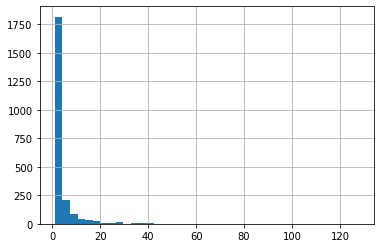

In [49]:
df_combined['Counts'].hist(bins=40)

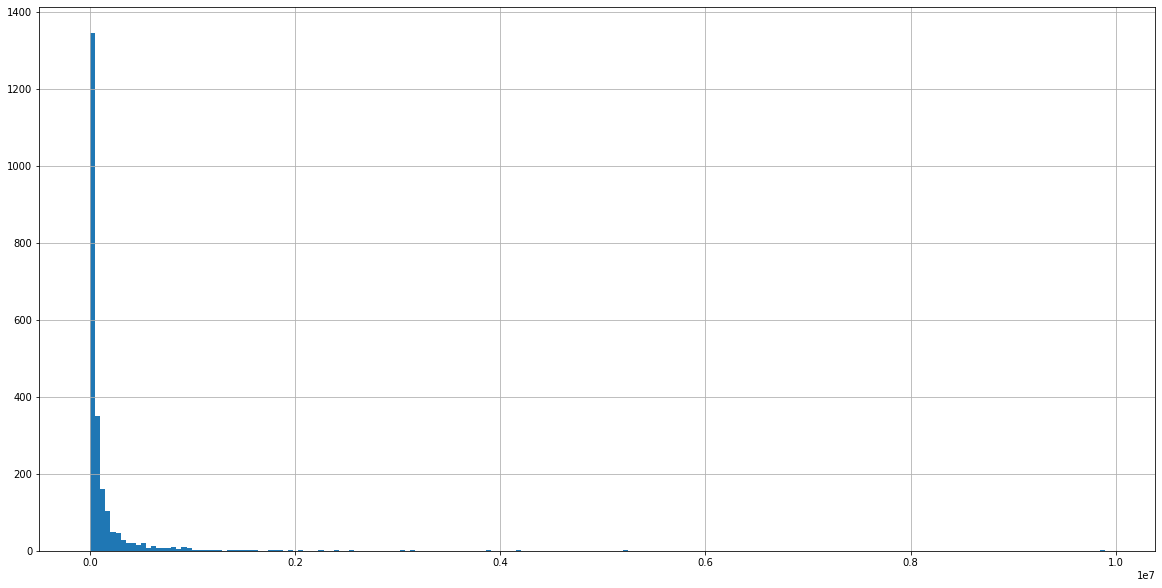

In [50]:
df_combined['population'].hist(bins=200,figsize=(20,10))

In [61]:
i=1
while i>=0:
    print('\nQuantile:',i,'\nCounts',df_combined['Counts'].quantile(i))
    i-=0.01
#df_combined['Counts'].quantile(0.5)     #.hist(bins=50,figsize=(20,10))


Quantile: 1 
Counts 128.0

Quantile: 0.99 
Counts 29.0

Quantile: 0.98 
Counts 21.0

Quantile: 0.97 
Counts 18.0

Quantile: 0.96 
Counts 15.0

Quantile: 0.95 
Counts 13.0

Quantile: 0.94 
Counts 11.0

Quantile: 0.9299999999999999 
Counts 10.0

Quantile: 0.9199999999999999 
Counts 9.0

Quantile: 0.9099999999999999 
Counts 8.0

Quantile: 0.8999999999999999 
Counts 8.0

Quantile: 0.8899999999999999 
Counts 7.0

Quantile: 0.8799999999999999 
Counts 7.0

Quantile: 0.8699999999999999 
Counts 6.0

Quantile: 0.8599999999999999 
Counts 6.0

Quantile: 0.8499999999999999 
Counts 6.0

Quantile: 0.8399999999999999 
Counts 5.0

Quantile: 0.8299999999999998 
Counts 5.0

Quantile: 0.8199999999999998 
Counts 5.0

Quantile: 0.8099999999999998 
Counts 5.0

Quantile: 0.7999999999999998 
Counts 4.0

Quantile: 0.7899999999999998 
Counts 4.0

Quantile: 0.7799999999999998 
Counts 4.0

Quantile: 0.7699999999999998 
Counts 4.0

Quantile: 0.7599999999999998 
Counts 4.0

Quantile: 0.7499999999999998 
Counts 4.0


Approximately 33% of the counties have 3 or more farmer's market. Let's take a quick look at what that represents population wise.

In [62]:
df_combined[df_combined['Counts']>=3]

,county,State,per capita income,median household income,median family income,population,number of households,County_State,Counts,website_count,...,WineYN,CoffeeYN,BeansYN,FruitsYN,GrainsYN,JuicesYN,MushroomsYN,PetFoodYN,TofuYN,WildHarvestedYN
0,New York,New York,62498.0,69659.0,84627.0,1605272.0,736192.0,"New York, New York",63,47,...,10.0,4.0,0.0,44.0,1.0,5.0,2.0,0.0,1.0,3.0
1,Arlington,Virginia,62018.0,103208.0,139244.0,214861.0,94454.0,"Arlington, Virginia",12,11,...,1.0,4.0,0.0,10.0,0.0,8.0,1.0,2.0,0.0,0.0
2,Marin,California,56791.0,90839.0,117357.0,254643.0,102912.0,"Marin, California",15,10,...,6.0,8.0,6.0,9.0,8.0,7.0,6.0,4.0,5.0,2.0
5,Fairfax,Virginia,50532.0,110292.0,128596.0,1101071.0,389908.0,"Fairfax, Virginia",25,24,...,3.0,10.0,1.0,24.0,1.0,18.0,3.0,5.0,0.0,1.0
6,Hunterdon,New Jersey,50349.0,106143.0,125828.0,127047.0,46816.0,"Hunterdon, New Jersey",5,3,...,2.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0
7,Montgomery,Maryland,49038.0,98221.0,117408.0,989474.0,360563.0,"Montgomery, Maryland",20,19,...,8.0,9.0,2.0,13.0,2.0,10.0,7.0,5.0,2.0,3.0
8,Morris,New Jersey,48814.0,98633.0,117683.0,495261.0,179665.0,"Morris, New Jersey",11,10,...,6.0,3.0,0.0,9.0,1.0,7.0,4.0,1.0,0.0,2.0
9,Fairfield,Connecticut,48721.0,82283.0,104250.0,926233.0,332655.0,"Fairfield, Connecticut",29,11,...,2.0,1.0,0.0,6.0,1.0,2.0,0.0,3.0,0.0,0.0
10,San Francisco,California,48486.0,75604.0,90116.0,817501.0,345344.0,"San Francisco, California",27,24,...,4.0,4.0,7.0,17.0,5.0,11.0,11.0,0.0,2.0,1.0
11,Howard,Maryland,48172.0,109865.0,128657.0,293821.0,106142.0,"Howard, Maryland",6,4,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
df_combined[df_combined['Counts']>=3]['population'].sum()

241276894.0

So total population of counties that have 3 or more farmer's market is 241,276,894 and make up for 33% of the total number of counties in the list. In the next section we'll use data from such counties (with 3 or more farmer's market) for machine learning.